In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("../../dados/housing.data", sep="\s+", header = None)
#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
y = df["target"]
x = df["RM"]

In [12]:
x = sm.add_constant(x)
x.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [28]:
#modelo_v1 = smf.ols(formula = 'target - RM', data = df)
modelo_v1 = smf.OLS(y, x)
modelo_v2 = modelo_v1.fit()
print(modelo_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        13:24:39   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [29]:
print (modelo_v2.params)

const   -34.670621
RM        9.102109
dtype: float64


In [41]:
#Previsão para RM=5
valores_previstos = modelo_v2.predict()
valores_previstos

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [42]:
modelo_v2.predict(np.array([1,5]))

array([10.83992413])

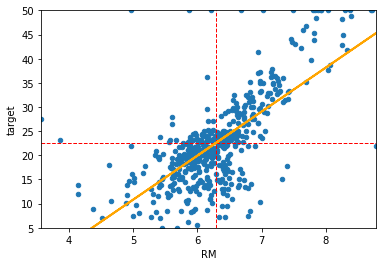

In [44]:
x_range = [df['RM'].min(), df['RM'].max()]
y_range = [df['target'].min(), df['target'].max()]
scatter_plot = df.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [df['target'].mean(), df['target'].mean()], '--', color='red', linewidth = 1)
meanX = scatter_plot.plot([df['RM'].mean(), df['RM'].mean()], y_range, '--', color='red', linewidth = 1)
regression_line = scatter_plot.plot(df['RM'], valores_previstos, '-', color = 'orange', linewidth = 2)

In [47]:
#previsões com numpy
coeficientes = np.array(modelo_v2.params)
previsoes_dot = np.dot(x, coeficientes)

In [46]:
previsoes_dot

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [50]:
residuos = df['target'] - valores_previstos
residuos_normalizados = standardize(residuos)

NameError: name 'standardize' is not defined